<a href="https://colab.research.google.com/github/ivanksinggih/capacitatedVRP_GA_Python_Colab/blob/main/CVRP_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# A. Objective function definition

import numpy as np
import matplotlib.pyplot as plt  # For figure generation
from matplotlib.ticker import FuncFormatter, MaxNLocator  # For figure generation
from decimal import Decimal

# Objective function
def objective_value_calculation(chromosome):

  print("--------------------------------------------------------------------")
  print("[Objective value calculation]")
  print("chromosome: ", chromosome)

  routes = []
  total_cost_per_route = []
  used_capacity_per_route = []

  # Add the depot and the first customer node (in the first route) into the current_route
  current_route = [0]
  current_route += [chromosome[0]]
  # Add the distance from the depot to the first customer node (in the first route) into the new route's total cost
  current_route_total_cost = Decimal(str(cost_matrix[0][chromosome[0]]))
  # Add the demand of the first customer node (in the first route) into the new route's used capacity
  current_route_used_capacity = demand[chromosome[0]]

  # Add the distance between customers (in route) into the objective_value
  for i in range(len(chromosome)-1):
    smaller_node_index = -1
    larger_node_index = -1
    if chromosome[i] < chromosome[i+1]:
      smaller_node_index = chromosome[i]
      larger_node_index = chromosome[i+1]
    else:
      smaller_node_index = chromosome[i+1]
      larger_node_index = chromosome[i]

    # Check whether adding the customer into the current route produces a feasible solution
    distance_between_customers = cost_matrix[smaller_node_index][larger_node_index]
    distance_next_customer_to_depot = cost_matrix[0][chromosome[i+1]]
    if current_route_used_capacity + demand[chromosome[i+1]] <= vehicle_capacity:  # Add the customer (without the depot) if a feasible solution can be produced (vehicle's capacity is not violated) even though after adding the customer and the final depot
      current_route += [chromosome[i+1]]
      current_route_total_cost += Decimal(str(distance_between_customers))
      current_route_used_capacity += demand[chromosome[i+1]]
    else:
      # Stop completing the current route and start another new route for serving the remaining customers
      current_route += [0]
      current_route_total_cost += Decimal(str(cost_matrix[0][chromosome[i]]))
      routes += [current_route]
      total_cost_per_route += [float(current_route_total_cost)]
      used_capacity_per_route += [current_route_used_capacity]

      # Add the depot and the next customer node into a new route
      current_route = [0]
      current_route += [chromosome[i+1]]
      # Add the distance from the depot to the next customer node into the new route's total cost
      current_route_total_cost = Decimal(str(cost_matrix[0][chromosome[i+1]]))
      # Add the demand of the next customer node into the new route's used capacity
      current_route_used_capacity = demand[chromosome[i+1]]

  # Add the distance from the last customer node to the depot (in route) into the objective_value
  current_route += [0]
  current_route_total_cost += Decimal(str(cost_matrix[0][chromosome[len(chromosome)-1]]))
  routes += [current_route]
  total_cost_per_route += [float(current_route_total_cost)]
  used_capacity_per_route += [current_route_used_capacity]

  objective_value = 0
  for i in total_cost_per_route:
    objective_value += Decimal(str(i))

  print("routes: ", routes)
  print("total_cost_per_route: ", total_cost_per_route)
  print("used_capacity_per_route: ", used_capacity_per_route)
  print("objective_value: ", objective_value)

  return objective_value

Program initialization:

In [2]:
# B. Program initialization

import random
random.seed(1)  # Option to fix the random seed (set as comment to produce various random values)
import math

# Input data

# Node          0  ,   1  ,   2  ,   3  ,   4  ,   5  ,   6  ,   7  ,   8  ,   9  ,  10     0 = depot; 1-10 = customers

cost_matrix = [[0  ,  44.8,  44.7,  40.4,  35.8,  30.6,  14.9,  24.0,  32.2,  43.7,  48.7],
               [0  ,   0  ,  48.1,  24.6,  35.8,  49.3,  34.1,  38.5,  30.7,  16.0,  20.5],
               [0  ,   0  ,   0  ,  36.9,  16.0,  49.9,  33.6,  31.8,  21.2,  36.2,  36.7],
               [0  ,   0  ,   0  ,   0  ,  27.0,  38.6,  40.7,  37.5,  19.2,  16.0,  36.1],
               [0  ,   0  ,   0  ,   0  ,   0  ,  39.3,  36.1,  36.7,  14.6,  33.6,  36.9],
               [0  ,   0  ,   0  ,   0  ,   0  ,   0  ,  27.3,  25.1,  48.8,  49.6,  31.8],
               [0  ,   0  ,   0  ,   0  ,   0  ,   0  ,   0  ,  26.9,  33.6,  31.1,  34.2],
               [0  ,   0  ,   0  ,   0  ,   0  ,   0  ,   0  ,   0  ,  37.0,  44.3,  32.9],
               [0  ,   0  ,   0  ,   0  ,   0  ,   0  ,   0  ,   0  ,   0  ,  29.2,  32.8],
               [0  ,   0  ,   0  ,   0  ,   0  ,   0  ,   0  ,   0  ,   0  ,   0  ,  23.0]]

demand      =  [0  , 122  ,  67  ,  81  , 110  ,  77  , 115  ,  48  ,  96  ,  59  ,  74  ]

vehicle_capacity = 300

Input data:

(1) Genetic algorithm parameters:

In [3]:
# C. Genetic algorithm parameter setting

population_size = 10
num_of_selected_initial_chromosomes = 6
crossover_rate = 0.8
mutation_rate = 0.2
num_of_population = 10

(2) Define chromosome length (based on the number of decision variables):

In [4]:
# D. Chromosome length determination

chromosome_length = len(cost_matrix)  # As many as the number of customers

Initial population:

In [5]:
# E. Initial population generation

# Prepare sets for storing best chromosomes and objective values in all populations
best_chromosomes = []
best_objective_values = []


# Generating chromosomes randomly for the initial population
population = []  # Set of chromosomes in a population
objective_value = []  # Set of objective values of chromosomes in a population
for i in range(population_size):
  chromosome = []  # A single chromosome
  for j in range(chromosome_length):
    chromosome += [j+1]  # Index of customers starts from 1 (0 is the depot index)
  random.shuffle(chromosome)
  population += [chromosome]
  
  # Calculating objective values of the chromosomes
  objective_value += [objective_value_calculation(chromosome)]

print("--------------------------------------------------------------------")
print('initial population:')
for i in range(population_size):
  rounded_value_chromosome = []
  for j in population[i]:
    rounded_value_chromosome += [float("{:.2f}".format(j))] 
  print('chromosome',i,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[i])))


# Find the best solution with the least objective value
min_objective_value =  float('inf')
selected_index = -1
for k in range(population_size):
  if objective_value[k] < min_objective_value:
    min_objective_value = objective_value[k]
    selected_index = k

# Store the best solution and the least objective value
best_chromosomes += [population[selected_index]]
best_objective_values += [objective_value[selected_index]]

--------------------------------------------------------------------
[Objective value calculation]
chromosome:  [7, 9, 10, 8, 6, 4, 1, 5, 2, 3]
routes:  [[0, 7, 9, 10, 8, 0], [0, 6, 4, 0], [0, 1, 5, 2, 0], [0, 3, 0]]
total_cost_per_route:  [156.3, 86.8, 188.7, 80.8]
used_capacity_per_route:  [277, 225, 266, 81]
objective_value:  512.6
--------------------------------------------------------------------
[Objective value calculation]
chromosome:  [5, 9, 3, 7, 6, 10, 1, 8, 2, 4]
routes:  [[0, 5, 9, 3, 7, 0], [0, 6, 10, 0], [0, 1, 8, 2, 0], [0, 4, 0]]
total_cost_per_route:  [157.7, 97.8, 141.4, 71.6]
used_capacity_per_route:  [265, 189, 285, 110]
objective_value:  468.5
--------------------------------------------------------------------
[Objective value calculation]
chromosome:  [8, 9, 7, 10, 6, 1, 3, 2, 4, 5]
routes:  [[0, 8, 9, 7, 10, 0], [0, 6, 1, 0], [0, 3, 2, 4, 0], [0, 5, 0]]
total_cost_per_route:  [187.3, 93.8, 129.1, 61.2]
used_capacity_per_route:  [277, 237, 258, 77]
objective_va

In [6]:
# F. Best chromosomes selection (1st population)

print('------------------------------------------------------------------')
print('population 0')
print('------------------------------------------------------------------')

# Store chromosomes and objective_values of current population into prev_population and prev_objective_value
# before performing crossover and mutation operators
prev_population = []
prev_objective_value = []
temp_objective_value = []  # For selecting the best chromosomes before crossover
for j in range(population_size):
  prev_population += [population[j]]
  prev_objective_value += [objective_value[j]]
  temp_objective_value += [objective_value[j]]

# Reset chromosomes and objective_values for the new population
population = []
objective_value = []

# Select best chromosomes
for j in range(num_of_selected_initial_chromosomes):
  min_value = float('inf')
  selected_index = -1
  for k in range(population_size):
    if temp_objective_value[k] < min_value:
      # Skip storing solution if the same solution has been stored before
      same_chromosome = 0
      for l in range(len(objective_value)):
        if temp_objective_value[k] == objective_value[l]:
          same_chromosome = 1
          for m in range(len(population[l])):
            if prev_population[k][m] != population[l][m]:
              same_chromosome = 0
              break
          if same_chromosome == 1:
            break
      if same_chromosome == 1:
        continue
      min_value = temp_objective_value[k]
      selected_index = k
  temp_objective_value[selected_index] = float('inf')
  population += [prev_population[selected_index]]
  objective_value += [prev_objective_value[selected_index]]

print()
print('best chromosomes:')
for i in range(len(population)):
  rounded_value_chromosome = []
  for j in population[i]:
    rounded_value_chromosome += [float("{:.2f}".format(j))] 
  print('chromosome',i,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[i])))

------------------------------------------------------------------
population 0
------------------------------------------------------------------

best chromosomes:
chromosome 0 =  [2.0, 10.0, 5.0, 7.0, 3.0, 9.0, 4.0, 1.0, 8.0, 6.0] ; objective_value = 425.60
chromosome 1 =  [3.0, 2.0, 8.0, 7.0, 5.0, 4.0, 1.0, 10.0, 9.0, 6.0] ; objective_value = 427.00
chromosome 2 =  [7.0, 9.0, 3.0, 5.0, 4.0, 6.0, 2.0, 8.0, 1.0, 10.0] ; objective_value = 435.80
chromosome 3 =  [3.0, 1.0, 5.0, 10.0, 7.0, 8.0, 2.0, 6.0, 4.0, 9.0] ; objective_value = 457.70
chromosome 4 =  [5.0, 9.0, 3.0, 7.0, 6.0, 10.0, 1.0, 8.0, 2.0, 4.0] ; objective_value = 468.50
chromosome 5 =  [8.0, 3.0, 9.0, 2.0, 5.0, 1.0, 6.0, 10.0, 4.0, 7.0] ; objective_value = 469.60


In [7]:
# G. Crossover operation (1st population)

# Perform crossover if a random value is less than the crossover_rate; otherwise, copy the values from the parents 
while len(population) < population_size:

  child1_chromosome = []
  child2_chromosome = []

  # Set selection probability for each parent
  # Chromosomes with smaller objective value (cost) must have higher selection probability
  total_inverse_of_objective_value = 0
  for j in range(num_of_selected_initial_chromosomes):
    total_inverse_of_objective_value += 1/objective_value[j]
  selection_probability_of_parents = list()
  accumulated_selection_probability_of_parents = list()
  temp_accumulated_value = 0
  for j in range(num_of_selected_initial_chromosomes):
    probability = (1/objective_value[j])/total_inverse_of_objective_value
    selection_probability_of_parents += [probability]
    accumulated_selection_probability_of_parents += [temp_accumulated_value + probability]
    temp_accumulated_value += probability
  accumulated_selection_probability_of_parents[num_of_selected_initial_chromosomes-1] = 1.0
  
  a_random_value = random.random()
  for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
    randomly_selected_parent1_ID = j
    parent1_chromosome = list()
    for k in range(len(population[randomly_selected_parent1_ID])):
      parent1_chromosome += [population[randomly_selected_parent1_ID][k]]
    parent1_objective_values = objective_value[randomly_selected_parent1_ID]
    if a_random_value > accumulated_selection_probability_of_parents[j]:
      break

  same_parent_ID_found = 1
  while same_parent_ID_found == 1:
    a_random_value = random.random()
    for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
      randomly_selected_parent2_ID = j
      parent2_chromosome = list()
      for k in range(len(population[randomly_selected_parent2_ID])):
        parent2_chromosome += [population[randomly_selected_parent2_ID][k]]
      parent2_objective_values = objective_value[randomly_selected_parent2_ID]
      if a_random_value > accumulated_selection_probability_of_parents[j]:
        break

    if randomly_selected_parent2_ID != randomly_selected_parent1_ID:  
      same_parent_ID_found = 0


  a_random_value = random.random()
  if a_random_value > crossover_rate:
    population += [parent1_chromosome]
    population += [parent2_chromosome]
    objective_value += [objective_value[randomly_selected_parent1_ID]]
    objective_value += [objective_value[randomly_selected_parent2_ID]]
  else:
    first_cut_point = random.randint(1,chromosome_length-3)
    second_cut_point = random.randint(first_cut_point,chromosome_length-2)

    print("--------------------------------------------------------------------")
    print("parent1_chromosome = ",parent1_chromosome)
    print("parent2_chromosome = ",parent2_chromosome)
    print()
    print("first_cut_point = ",first_cut_point)
    print("second_cut_point = ",second_cut_point)
    print()

    parent1_to_copy_exact_positions = []
    parent2_to_copy_exact_positions = []
    for j in range(first_cut_point,second_cut_point+1):
      parent1_to_copy_exact_positions += [parent1_chromosome[j]]
      parent2_to_copy_exact_positions += [parent2_chromosome[j]]

    parent1_to_copy_other_first_positions = []
    parent1_to_copy_other_last_positions = []
    parent2_to_copy_other_first_positions = []
    parent2_to_copy_other_last_positions = []
    for j in range(0,chromosome_length):
      if parent1_chromosome[j] not in parent2_to_copy_exact_positions:
        if len(parent1_to_copy_other_first_positions) < first_cut_point:
          parent1_to_copy_other_first_positions += [parent1_chromosome[j]]
        else:
          parent1_to_copy_other_last_positions += [parent1_chromosome[j]]
      if parent2_chromosome[j] not in parent1_to_copy_exact_positions:
        if len(parent2_to_copy_other_first_positions) < first_cut_point:
          parent2_to_copy_other_first_positions += [parent2_chromosome[j]]
        else:
          parent2_to_copy_other_last_positions += [parent2_chromosome[j]]

    child1_chromosome = parent2_to_copy_other_first_positions + parent1_to_copy_exact_positions + parent2_to_copy_other_last_positions
    child2_chromosome = parent1_to_copy_other_first_positions + parent2_to_copy_exact_positions + parent1_to_copy_other_last_positions

    print("parent2_to_copy_other_first_positions = ",parent2_to_copy_other_first_positions)
    print("parent1_to_copy_exact_positions = ",parent1_to_copy_exact_positions)
    print("parent2_to_copy_other_last_positions = ",parent2_to_copy_other_last_positions)
    print("child1_chromosome = ",child1_chromosome)
    print()
    print("parent1_to_copy_other_first_positions = ",parent1_to_copy_other_first_positions)
    print("parent2_to_copy_exact_positions = ",parent2_to_copy_exact_positions)
    print("parent1_to_copy_other_last_positions = ",parent1_to_copy_other_last_positions)
    print("child2_chromosome = ",child2_chromosome)

    child1_objective_values = objective_value_calculation(child1_chromosome)
    child2_objective_values = objective_value_calculation(child2_chromosome)

    # Find two best chromosomes among parent and child chromosomes
    temp_objective_value_of_chromosomes = list()
    temp_chromosomes = [[-1 for x in range(chromosome_length)] for y in range(4)]
    index_of_chromosome = 0

    temp_objective_value_of_chromosomes += [parent1_objective_values]
    temp_chromosomes[0] = parent1_chromosome
    temp_objective_value_of_chromosomes += [parent2_objective_values]
    temp_chromosomes[1] = parent2_chromosome
    temp_objective_value_of_chromosomes += [child1_objective_values]
    temp_chromosomes[2] = child1_chromosome
    temp_objective_value_of_chromosomes += [child2_objective_values]
    temp_chromosomes[3] = child2_chromosome

    temp_best_objective_value_of_chromosomes = float('inf')
    for j in range(4):
        if temp_objective_value_of_chromosomes[j] < temp_best_objective_value_of_chromosomes:
            temp_best_objective_value_of_chromosomes = temp_objective_value_of_chromosomes[j]
            selected_temp_chromosome_ID = j
    population += [temp_chromosomes[selected_temp_chromosome_ID]]
    objective_value += [temp_objective_value_of_chromosomes[selected_temp_chromosome_ID]]
    temp_objective_value_of_chromosomes[selected_temp_chromosome_ID] = float('inf')

    temp_best_objective_value_of_chromosomes = float('inf')
    for j in range(4):
        if temp_objective_value_of_chromosomes[j] < temp_best_objective_value_of_chromosomes:
            temp_best_objective_value_of_chromosomes = temp_objective_value_of_chromosomes[j]
            selected_temp_chromosome_ID = j
    population += [temp_chromosomes[selected_temp_chromosome_ID]]
    objective_value += [temp_objective_value_of_chromosomes[selected_temp_chromosome_ID]]

print("--------------------------------------------------------------------")
print('population (after crossover):')
for i in range(population_size):
  rounded_value_chromosome = []
  for j in population[i]:
    rounded_value_chromosome += [float("{:.2f}".format(j))] 
  print('chromosome',i,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[i])))

--------------------------------------------------------------------
parent1_chromosome =  [2, 10, 5, 7, 3, 9, 4, 1, 8, 6]
parent2_chromosome =  [5, 9, 3, 7, 6, 10, 1, 8, 2, 4]

first_cut_point =  4
second_cut_point =  8

parent2_to_copy_other_first_positions =  [5, 7, 6, 10]
parent1_to_copy_exact_positions =  [3, 9, 4, 1, 8]
parent2_to_copy_other_last_positions =  [2]
child1_chromosome =  [5, 7, 6, 10, 3, 9, 4, 1, 8, 2]

parent1_to_copy_other_first_positions =  [5, 7, 3, 9]
parent2_to_copy_exact_positions =  [6, 10, 1, 8, 2]
parent1_to_copy_other_last_positions =  [4]
child2_chromosome =  [5, 7, 3, 9, 6, 10, 1, 8, 2, 4]
--------------------------------------------------------------------
[Objective value calculation]
chromosome:  [5, 7, 6, 10, 3, 9, 4, 1, 8, 2]
routes:  [[0, 5, 7, 6, 0], [0, 10, 3, 9, 0], [0, 4, 1, 0], [0, 8, 2, 0]]
total_cost_per_route:  [97.5, 144.5, 116.4, 98.1]
used_capacity_per_route:  [240, 214, 232, 163]
objective_value:  456.5
---------------------------------

In [8]:
# H. Mutation operation (1st population)

# Perform mutation if a random value is less than the mutation_rate; otherwise, copy the values from the parents 
for l in range(population_size):

  parent_chromosome = list()
  child_chromosome = list()
  for k in range(len(population[l])):
    parent_chromosome += [population[l][k]]
    child_chromosome += [population[l][k]]

  a_random_value = random.random()
  # if a_random_value > mutation_rate:  Keep the parent chromosome & its objective value
  if a_random_value <= mutation_rate:

    print("--------------------------------------------------------------------")
    print("parent_chromosome = ",parent_chromosome)

    first_index_to_mutate = random.randint(0,chromosome_length-1)

    same_index_found = 1
    while same_index_found == 1:
      second_index_to_mutate = random.randint(0,chromosome_length-1)
      if second_index_to_mutate != first_index_to_mutate:  
        same_index_found = 0

    temp = child_chromosome[first_index_to_mutate]
    child_chromosome[first_index_to_mutate] = child_chromosome[second_index_to_mutate]
    child_chromosome[second_index_to_mutate] = temp

    print("first_index_to_mutate = ",first_index_to_mutate)
    print("second_index_to_mutate = ",second_index_to_mutate)
    print("child_chromosome = ",child_chromosome)

    child_objective_value = objective_value_calculation(child_chromosome)

    # Store the best chromosome among parent and child chromosomes
    # if parent_objective_value < child_objective_value:  Keep the parent chromosome & its objective value
    if child_objective_value <= objective_value[l]:
      population[l] = child_chromosome
      objective_value[l] = child_objective_value

print("--------------------------------------------------------------------")
print('population (after mutation):')
for i in range(population_size):
  rounded_value_chromosome = []
  for j in population[i]:
    rounded_value_chromosome += [float("{:.2f}".format(j))] 
  print('chromosome',i,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[i])))


# Find the best solution with the least objective value
min_objective_value =  float('inf')
selected_index = -1
for k in range(population_size):
  if objective_value[k] < min_objective_value:
    min_objective_value = objective_value[k]
    selected_index = k

# Store the best solution and the least objective value
best_chromosomes += [population[selected_index]]
best_objective_values += [objective_value[selected_index]]

--------------------------------------------------------------------
parent_chromosome =  [7, 9, 3, 5, 4, 6, 2, 8, 1, 10]
first_index_to_mutate =  8
second_index_to_mutate =  2
child_chromosome =  [7, 9, 1, 5, 4, 6, 2, 8, 3, 10]
--------------------------------------------------------------------
[Objective value calculation]
chromosome:  [7, 9, 1, 5, 4, 6, 2, 8, 3, 10]
routes:  [[0, 7, 9, 1, 0], [0, 5, 4, 0], [0, 6, 2, 8, 0], [0, 3, 10, 0]]
total_cost_per_route:  [129.1, 105.7, 101.9, 125.2]
used_capacity_per_route:  [229, 187, 278, 155]
objective_value:  461.9
--------------------------------------------------------------------
parent_chromosome =  [2, 10, 5, 7, 3, 9, 4, 1, 8, 6]
first_index_to_mutate =  5
second_index_to_mutate =  9
child_chromosome =  [2, 10, 5, 7, 3, 6, 4, 1, 8, 9]
--------------------------------------------------------------------
[Objective value calculation]
chromosome:  [2, 10, 5, 7, 3, 6, 4, 1, 8, 9]
routes:  [[0, 2, 10, 5, 7, 0], [0, 3, 6, 0], [0, 4, 1, 0],

------------------------------------------------------------------
population 1
------------------------------------------------------------------

best chromosomes:
chromosome 0 =  [2.0, 10.0, 5.0, 7.0, 3.0, 9.0, 4.0, 1.0, 8.0, 6.0] ; objective_value = 425.60
chromosome 1 =  [3.0, 2.0, 8.0, 7.0, 5.0, 4.0, 1.0, 10.0, 9.0, 6.0] ; objective_value = 427.00
chromosome 2 =  [5.0, 6.0, 10.0, 7.0, 3.0, 9.0, 4.0, 1.0, 8.0, 2.0] ; objective_value = 429.10
chromosome 3 =  [7.0, 9.0, 3.0, 5.0, 4.0, 6.0, 2.0, 8.0, 1.0, 10.0] ; objective_value = 435.80
chromosome 4 =  [5.0, 7.0, 6.0, 10.0, 3.0, 9.0, 4.0, 1.0, 8.0, 2.0] ; objective_value = 456.50
chromosome 5 =  [3.0, 1.0, 5.0, 10.0, 7.0, 8.0, 2.0, 6.0, 4.0, 9.0] ; objective_value = 457.70
--------------------------------------------------------------------
[Objective value calculation]
chromosome:  [3, 7, 5, 4, 1, 6, 2, 8, 10, 9]
routes:  [[0, 3, 7, 5, 0], [0, 4, 1, 0], [0, 6, 2, 8, 0], [0, 10, 9, 0]]
total_cost_per_route:  [133.6, 116.4, 101.9, 11

No handles with labels found to put in legend.


[6, 10, 5, 7, 3, 2, 4, 1, 8, 9]
routes:  [[0, 6, 10, 5, 0], [0, 7, 3, 2, 0], [0, 4, 1, 0], [0, 8, 9, 0]]
total_cost_per_route:  [111.5, 143.1, 116.4, 105.1]
used_capacity_per_route:  [266, 196, 232, 155]
objective_value:  476.1
--------------------------------------------------------------------
[Objective value calculation]
chromosome:  [5, 7, 1, 6, 3, 9, 4, 2, 8, 10]
routes:  [[0, 5, 7, 1, 0], [0, 6, 3, 9, 0], [0, 4, 2, 8, 0], [0, 10, 0]]
total_cost_per_route:  [139.0, 115.3, 105.2, 97.4]
used_capacity_per_route:  [247, 255, 273, 74]
objective_value:  456.9
--------------------------------------------------------------------
population (after mutation):
chromosome 0 =  [1.0, 10.0, 5.0, 7.0, 3.0, 9.0, 4.0, 2.0, 8.0, 6.0] ; objective_value = 389.00
chromosome 1 =  [6.0, 10.0, 5.0, 7.0, 3.0, 9.0, 8.0, 1.0, 4.0, 2.0] ; objective_value = 391.70
chromosome 2 =  [6.0, 10.0, 5.0, 7.0, 3.0, 9.0, 4.0, 1.0, 8.0, 2.0] ; objective_value = 399.80
chromosome 3 =  [3.0, 2.0, 8.0, 4.0, 5.0, 7.0, 1.0,

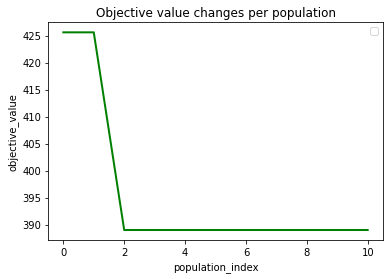

In [9]:
# I. Best chromosomes selection, crossover & mutation operations (2nd population until the last population), result presentation

for i in range(num_of_population):

  if i == 0:
    continue  

  print('------------------------------------------------------------------')
  print('population',i)
  print('------------------------------------------------------------------')

  # Store chromosomes and objective_values of current population into prev_population and prev_objective_value
  # before performing crossover and mutation operators
  prev_population = []
  prev_objective_value = []
  temp_objective_value = []  # For selecting the best chromosomes before crossover
  for j in range(population_size):
    prev_population += [population[j]]
    prev_objective_value += [objective_value[j]]
    temp_objective_value += [objective_value[j]]

  # Reset chromosomes and objective_values for the new population
  population = []
  objective_value = []

  # Select best chromosomes
  for j in range(num_of_selected_initial_chromosomes):
    min_value = float('inf')
    selected_index = -1
    for k in range(population_size):
      if temp_objective_value[k] < min_value:
        # Skip storing solution if the same solution has been stored before
        same_chromosome = 0
        for l in range(len(objective_value)):
          if temp_objective_value[k] == objective_value[l]:
            same_chromosome = 1
            for m in range(len(population[l])):
              if prev_population[k][m] != population[l][m]:
                same_chromosome = 0
                break
            if same_chromosome == 1:
              break
        if same_chromosome == 1:
          continue
        min_value = temp_objective_value[k]
        selected_index = k
    temp_objective_value[selected_index] = float('inf')
    population += [prev_population[selected_index]]
    objective_value += [prev_objective_value[selected_index]]

  print()
  print('best chromosomes:')
  for j in range(len(population)):
    rounded_value_chromosome = []
    for k in population[j]:
      rounded_value_chromosome += [float("{:.2f}".format(k))] 
    print('chromosome',j,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[j])))


  # Perform crossover

  # Perform crossover if a random value is less than the crossover_rate; otherwise, copy the values from the parents 
  while len(population) < population_size:

    child1_chromosome = []
    child2_chromosome = []

    # Set selection probability for each parent
    # Chromosomes with smaller objective value (cost) must have higher selection probability
    total_inverse_of_objective_value = 0
    for j in range(num_of_selected_initial_chromosomes):
      total_inverse_of_objective_value += 1/objective_value[j]
    selection_probability_of_parents = list()
    accumulated_selection_probability_of_parents = list()
    temp_accumulated_value = 0
    for j in range(num_of_selected_initial_chromosomes):
      probability = (1/objective_value[j])/total_inverse_of_objective_value
      selection_probability_of_parents += [probability]
      accumulated_selection_probability_of_parents += [temp_accumulated_value + probability]
      temp_accumulated_value += probability
    accumulated_selection_probability_of_parents[num_of_selected_initial_chromosomes-1] = 1.0
    
    a_random_value = random.random()
    for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
      randomly_selected_parent1_ID = j
      parent1_chromosome = list()
      for k in range(len(population[randomly_selected_parent1_ID])):
        parent1_chromosome += [population[randomly_selected_parent1_ID][k]]
      parent1_objective_values = objective_value[randomly_selected_parent1_ID]
      if a_random_value > accumulated_selection_probability_of_parents[j]:
        break

    same_parent_ID_found = 1
    while same_parent_ID_found == 1:
      a_random_value = random.random()
      for j in range(num_of_selected_initial_chromosomes-1, -1, -1):
        randomly_selected_parent2_ID = j
        parent2_chromosome = list()
        for k in range(len(population[randomly_selected_parent2_ID])):
          parent2_chromosome += [population[randomly_selected_parent2_ID][k]]
        parent2_objective_values = objective_value[randomly_selected_parent2_ID]
        if a_random_value > accumulated_selection_probability_of_parents[j]:
          break

      if randomly_selected_parent2_ID != randomly_selected_parent1_ID:  
        same_parent_ID_found = 0


    a_random_value = random.random()
    if a_random_value > crossover_rate:
      population += [parent1_chromosome]
      population += [parent2_chromosome]
      objective_value += [objective_value[randomly_selected_parent1_ID]]
      objective_value += [objective_value[randomly_selected_parent2_ID]]
    else:
      first_cut_point = random.randint(1,chromosome_length-3)
      second_cut_point = random.randint(first_cut_point,chromosome_length-2)

      parent1_to_copy_exact_positions = []
      parent2_to_copy_exact_positions = []
      for j in range(first_cut_point,second_cut_point+1):
        parent1_to_copy_exact_positions += [parent1_chromosome[j]]
        parent2_to_copy_exact_positions += [parent2_chromosome[j]]

      parent1_to_copy_other_first_positions = []
      parent1_to_copy_other_last_positions = []
      parent2_to_copy_other_first_positions = []
      parent2_to_copy_other_last_positions = []
      for j in range(0,chromosome_length):
        if parent1_chromosome[j] not in parent2_to_copy_exact_positions:
          if len(parent1_to_copy_other_first_positions) < first_cut_point:
            parent1_to_copy_other_first_positions += [parent1_chromosome[j]]
          else:
            parent1_to_copy_other_last_positions += [parent1_chromosome[j]]
        if parent2_chromosome[j] not in parent1_to_copy_exact_positions:
          if len(parent2_to_copy_other_first_positions) < first_cut_point:
            parent2_to_copy_other_first_positions += [parent2_chromosome[j]]
          else:
            parent2_to_copy_other_last_positions += [parent2_chromosome[j]]

      child1_chromosome = parent2_to_copy_other_first_positions + parent1_to_copy_exact_positions + parent2_to_copy_other_last_positions
      child2_chromosome = parent1_to_copy_other_first_positions + parent2_to_copy_exact_positions + parent1_to_copy_other_last_positions

      child1_objective_values = objective_value_calculation(child1_chromosome)
      child2_objective_values = objective_value_calculation(child2_chromosome)

      # Find two best chromosomes among parent and child chromosomes
      temp_objective_value_of_chromosomes = list()
      temp_chromosomes = [[-1 for x in range(chromosome_length)] for y in range(4)]
      index_of_chromosome = 0

      temp_objective_value_of_chromosomes += [parent1_objective_values]
      temp_chromosomes[0] = parent1_chromosome
      temp_objective_value_of_chromosomes += [parent2_objective_values]
      temp_chromosomes[1] = parent2_chromosome
      temp_objective_value_of_chromosomes += [child1_objective_values]
      temp_chromosomes[2] = child1_chromosome
      temp_objective_value_of_chromosomes += [child2_objective_values]
      temp_chromosomes[3] = child2_chromosome

      temp_best_objective_value_of_chromosomes = float('inf')
      for j in range(4):
          if temp_objective_value_of_chromosomes[j] < temp_best_objective_value_of_chromosomes:
              temp_best_objective_value_of_chromosomes = temp_objective_value_of_chromosomes[j]
              selected_temp_chromosome_ID = j
      population += [temp_chromosomes[selected_temp_chromosome_ID]]
      objective_value += [temp_objective_value_of_chromosomes[selected_temp_chromosome_ID]]
      temp_objective_value_of_chromosomes[selected_temp_chromosome_ID] = float('inf')

      temp_best_objective_value_of_chromosomes = float('inf')
      for j in range(4):
          if temp_objective_value_of_chromosomes[j] < temp_best_objective_value_of_chromosomes:
              temp_best_objective_value_of_chromosomes = temp_objective_value_of_chromosomes[j]
              selected_temp_chromosome_ID = j
      population += [temp_chromosomes[selected_temp_chromosome_ID]]
      objective_value += [temp_objective_value_of_chromosomes[selected_temp_chromosome_ID]]

  print("--------------------------------------------------------------------")
  print('population (after crossover):')
  for j in range(population_size):
    rounded_value_chromosome = []
    for k in population[j]:
      rounded_value_chromosome += [float("{:.2f}".format(k))] 
    print('chromosome',j,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[j])))


  # Perform mutation

  # Perform mutation if a random value is less than the mutation_rate; otherwise, copy the values from the parents 
  for l in range(population_size):

    parent_chromosome = list()
    child_chromosome = list()
    for k in range(len(population[l])):
      parent_chromosome += [population[l][k]]
      child_chromosome += [population[l][k]]

    a_random_value = random.random()
    # if a_random_value > mutation_rate:  Keep the parent chromosome & its objective value
    if a_random_value <= mutation_rate:

      first_index_to_mutate = random.randint(0,chromosome_length-1)

      same_index_found = 1
      while same_index_found == 1:
        second_index_to_mutate = random.randint(0,chromosome_length-1)
        if second_index_to_mutate != first_index_to_mutate:  
          same_index_found = 0

      temp = child_chromosome[first_index_to_mutate]
      child_chromosome[first_index_to_mutate] = child_chromosome[second_index_to_mutate]
      child_chromosome[second_index_to_mutate] = temp

      child_objective_value = objective_value_calculation(child_chromosome)

      # Store the best chromosome among parent and child chromosomes
      # if parent_objective_value < child_objective_value:  Keep the parent chromosome & its objective value
      if child_objective_value <= objective_value[l]:
        population[l] = child_chromosome
        objective_value[l] = child_objective_value

  print("--------------------------------------------------------------------")
  print('population (after mutation):')
  for j in range(population_size):
    rounded_value_chromosome = []
    for k in population[j]:
      rounded_value_chromosome += [float("{:.2f}".format(k))] 
    print('chromosome',j,'= ',rounded_value_chromosome,'; objective_value =',str("{:.2f}".format(objective_value[j])))
  print()
  print()


  # Find the best solution with the least objective value
  min_objective_value = float('inf')
  selected_index = -1
  for k in range(population_size):
    if objective_value[k] < min_objective_value:
      min_objective_value = objective_value[k]
      selected_index = k

  # Store the best solution and the least objective value
  best_chromosomes += [population[selected_index]]
  best_objective_values += [objective_value[selected_index]]


print('Best solutions in each population:')
for j in range(len(best_objective_values)):
  rounded_value_chromosome = []
  for k in best_chromosomes[j]:
    rounded_value_chromosome += [float("{:.2f}".format(k))] 
  print('best_chromosome',j,'= ',rounded_value_chromosome,'; best_objective_value =',str("{:.2f}".format(best_objective_values[j])))
print()

# Figure generation
plot_x = list()
for i in range(len(best_objective_values)):
    plot_x += [i]
fig, data = plt.subplots()
data.plot(plot_x, best_objective_values, color='green', linewidth=2)
leg = data.legend();
data.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Objective value changes per population')
plt.xlabel("population_index")
plt.ylabel("objective_value")

plt.show()